<a href="https://colab.research.google.com/github/MDRobiulhassan/Diabetes-Prediction/blob/main/Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/Eartquakes-1990-2023.csv')

In [22]:
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [27]:
df.shape

(3445751, 12)

In [24]:
df.isna().sum() / len(df)

,0
time,0.0
place,0.0
status,0.0
tsunami,0.0
significance,0.0
data_type,0.0
magnitudo,0.0
state,0.0
longitude,0.0
latitude,0.0


In [25]:
df.duplicated().sum()

np.int64(16869)

In [28]:
df = df.drop_duplicates().reset_index(drop=True)

In [29]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,3428882.0,1.247118e+12,2.975887e+11,6.311534e+11,1.024409e+12,1.282329e+12,1.508620e+12,1.690629e+12
tsunami,3428882.0,4.424183e-04,2.102909e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
significance,3428882.0,7.400236e+01,1.016332e+02,0.000000e+00,1.300000e+01,3.300000e+01,8.100000e+01,2.910000e+03
magnitudo,3428882.0,1.773933e+00,1.291012e+00,-9.990000e+00,9.100000e-01,1.460000e+00,2.300000e+00,9.100000e+00
longitude,3428882.0,-1.012787e+02,7.698497e+01,-1.799997e+02,-1.464195e+02,-1.189527e+02,-1.159280e+02,1.800000e+02
latitude,3428882.0,3.746733e+01,2.040831e+01,-8.442200e+01,3.406400e+01,3.793420e+01,4.784117e+01,8.738600e+01
depth,3428882.0,2.285096e+01,5.484797e+01,-1.000000e+01,3.120000e+00,7.700000e+00,1.611100e+01,7.358000e+02


In [32]:
import pandas as pd

outlier_summary = []

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df


,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,tsunami,0.0000,0.000000,0.00000,0.000000,1517
1,significance,13.0000,81.000000,-89.00000,183.000000,457227
2,magnitudo,0.9100,2.300000,-1.17500,4.385000,243466
3,longitude,-146.4195,-115.928000,-192.15675,-70.190750,501900
4,latitude,34.0640,47.841167,13.39825,68.506917,296909
5,depth,3.1200,16.111000,-16.36650,35.597500,490365


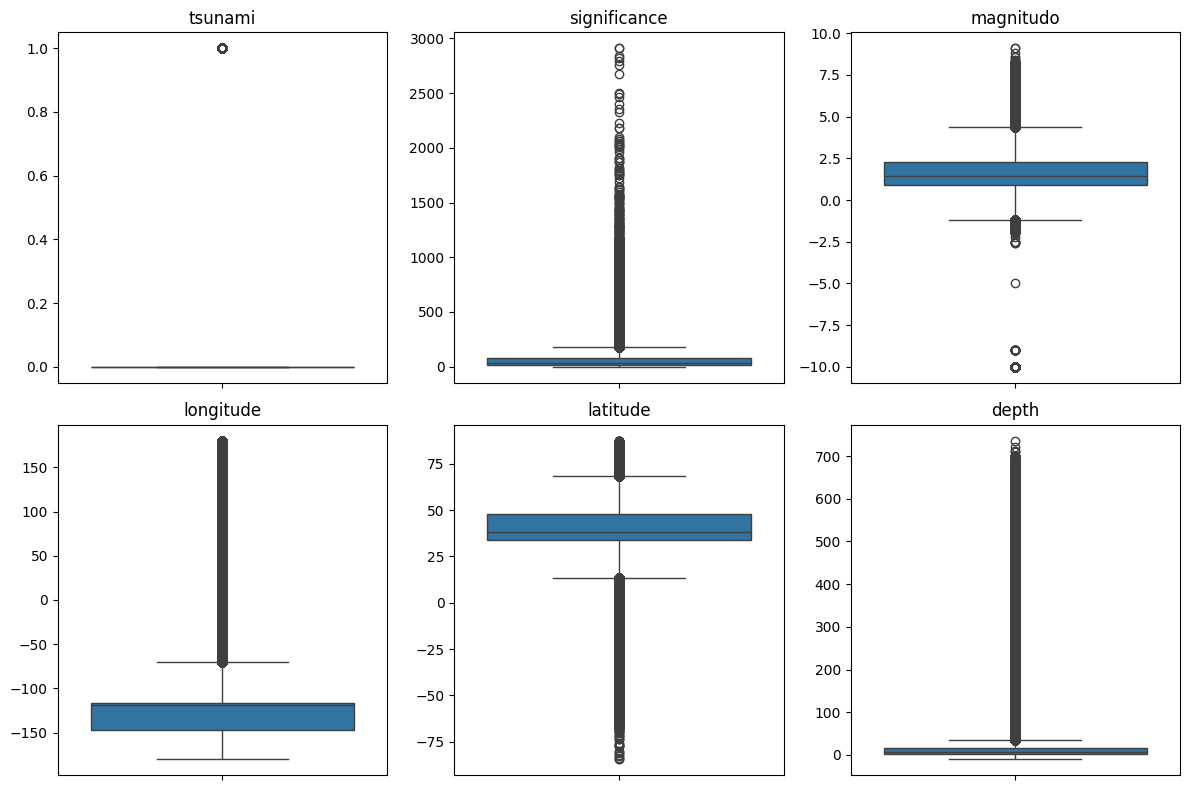

In [34]:
# Numeric columns to plot
numeric_features = ['tsunami', 'significance', 'magnitudo', 'longitude', 'latitude', 'depth']

rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [35]:
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower, upper)

print("Outliers have been capped.")

Outliers have been capped.


In [36]:
capped_summary = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,tsunami,0.0000,0.000000,0.00000,0.000000,0
1,significance,13.0000,81.000000,-89.00000,183.000000,0
2,magnitudo,0.9100,2.300000,-1.17500,4.385000,0
3,longitude,-146.4195,-115.928000,-192.15675,-70.190750,0
4,latitude,34.0640,47.841167,13.39825,68.506917,0
5,depth,3.1200,16.111000,-16.36650,35.597500,0


In [49]:
cols = ['significance', 'magnitudo', 'depth', 'longitude', 'latitude', 'tsunami']
df[cols].describe()

,significance,magnitudo,depth,longitude,latitude,tsunami
count,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3.428882e+06,3428882.0
mean,5.772111e+01,1.757334e+00,1.223038e+01,-1.205937e+02,3.983165e+01,0.0
std,6.053158e+01,1.200848e+00,1.214412e+01,2.794186e+01,1.420589e+01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.799997e+02,1.339825e+01,0.0
25%,1.300000e+01,9.100000e-01,3.120000e+00,-1.464195e+02,3.406400e+01,0.0
50%,3.300000e+01,1.460000e+00,7.700000e+00,-1.189527e+02,3.793420e+01,0.0
75%,8.100000e+01,2.300000e+00,1.611100e+01,-1.159280e+02,4.784117e+01,0.0
max,1.830000e+02,4.385000e+00,3.559750e+01,-7.019075e+01,6.850692e+01,0.0


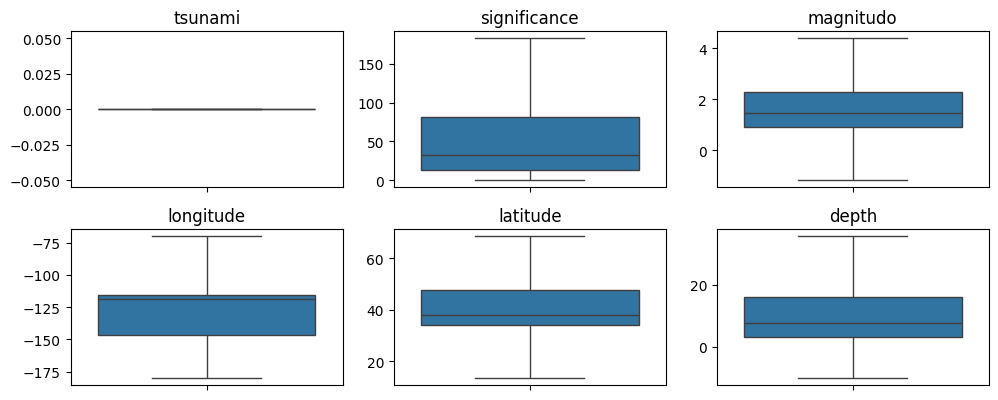

In [43]:
rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [44]:
numeric_features = df.select_dtypes(include='number').columns

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # For features that can't be negative, set lower bound to 0
    if feature in ['magnitudo', 'depth', 'tsunami', 'significance']:
        lower = 0

    df[feature] = df[feature].clip(lower, upper)

print("Outliers capped with logical bounds.")


Outliers capped with logical bounds.


In [45]:
capped_summary = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,time,1.024409e+12,1.508620e+12,2.980918e+11,2.234937e+12,0
1,tsunami,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2,significance,1.300000e+01,8.100000e+01,-8.900000e+01,1.830000e+02,0
3,magnitudo,9.100000e-01,2.300000e+00,-1.175000e+00,4.385000e+00,0
4,longitude,-1.464195e+02,-1.159280e+02,-1.921567e+02,-7.019075e+01,0
5,latitude,3.406400e+01,4.784117e+01,1.339825e+01,6.850692e+01,0
6,depth,3.120000e+00,1.611100e+01,-1.636650e+01,3.559750e+01,0


In [48]:
cols = ['significance', 'magnitudo', 'depth', 'longitude', 'latitude', 'tsunami']
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
significance,3428882.0,57.721105,60.531583,0.00000,13.0000,33.000000,81.000000,183.000000
magnitudo,3428882.0,1.757334,1.200848,0.00000,0.9100,1.460000,2.300000,4.385000
depth,3428882.0,12.230378,12.144117,0.00000,3.1200,7.700000,16.111000,35.597500
longitude,3428882.0,-120.593720,27.941864,-179.99970,-146.4195,-118.952667,-115.928000,-70.190750
latitude,3428882.0,39.831654,14.205892,13.39825,34.0640,37.934200,47.841167,68.506917
tsunami,3428882.0,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000
